In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch
from datasets import load_dataset
import pandas as pd
from readability import Readability
import numpy as np
from src.tfr_decoding.custom_bs import beam_search
from src.tfr_decoding.recurse_samp import sample
from src.utils.samp_utils import inpsampall

device = 'cuda:3' # if you have a GPU

2023-04-06 15:47:22.781000: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-06 15:47:22.781022: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
# get generation model
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-xxl")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-xxl", device_map="auto")#.to(device)

model.eval()

# get shp model
steamtok = T5Tokenizer.from_pretrained('stanfordnlp/SteamSHP-flan-t5-xl')
steamshp = T5ForConditionalGeneration.from_pretrained('stanfordnlp/SteamSHP-flan-t5-xl').to(device)

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
model.beam_search = beam_search.__get__(model)
model.sample = sample.__get__(model)

In [6]:
eli5 = load_dataset("stanfordnlp/shp", data_dir="explainlikeimfive")
eliorig = pd.DataFrame(eli5['test'])
elidf = eliorig.drop_duplicates(subset="history")

Using custom data configuration stanfordnlp--shp-3cfba0d7340ad90b
Reusing dataset json (/home/prasann/.cache/huggingface/datasets/stanfordnlp___json/stanfordnlp--shp-3cfba0d7340ad90b/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)


  0%|          | 0/3 [00:00<?, ?it/s]

In [19]:
pflen = [.7, -1]
rchoose = [2, 2]
tsamps = [4, 4]

#sampfrominp(3, 0, inpsall, pflen, rchoose, tsamps)
isall = inpsampall(elidf.iloc[:1], tokenizer, model, steamtok, steamshp, None, pflen, rchoose, tsamps, 0.9)

monkeysamp


/home/prasann/miniconda3/envs/rewardenv/lib/python3.8/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 4 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/prasann/miniconda3/envs/rewardenv/lib/python3.8/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 4 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


[36, 35]
prefcut  24
PREFIX: 
['<pad>The average person spends a total of 8 hours a day resting, performing no work. The total', '<pad>Your body burns 2000 calories a day by having to keep your internal body temperature up. By doing nothing,', '<pad>The average person spends a total of 8 hours a day resting, performing no work. The total', '<pad>Your body burns 2000 calories a day by having to keep your internal body temperature up. By doing nothing,']
monkeysamp
[40, 37]
prefcut  -38
PREFIX: 
['<pad>Your body burns 2000 calories a day by having to', '<pad>The average person spends a total of 8 hours', '<pad>Your body burns 2000 calories a day by having to', '<pad>The average person spends a total of 8 hours']
newbest  0.7608951926231384 ; oldbest  0.7963003516197205
newavg  0.7328636050224304 ; oldavg 0.7251375764608383


In [25]:
isall['stats'].iloc[0][0]['skewness']

[[124.6, 124.6, 124.6, 124.6],
 [179.0, 138.7, 138.7, 138.7],
 [165.6, 123.3, 94.06, 155.0],
 [179.2, 158.1, 151.6, 179.2],
 [174.6, 179.2, 178.3, 178.1],
 [179.2, 107.4, 179.2, 98.21],
 [176.9, 178.4, 179.2, 131.6],
 [179.2, 125.0, 130.0, 119.7],
 [179.2, 179.2, 111.7, 115.9],
 [90.37, 103.7, 163.6, 76.7],
 [133.3, 175.6, 179.2, 134.2],
 [92.17, 102.9, 179.2, 158.8],
 [93.79, 179.2, 179.2, 151.1],
 [147.7, 179.2, 179.2, 122.3],
 [136.2, 109.0, 151.7, 156.3],
 [105.9, 179.2, 149.0, 179.2],
 [178.6, 112.1, 137.6, 126.8],
 [81.26, 113.1, 177.9, 171.3],
 [142.4, 58.11, 164.3, 159.8],
 [81.86, 146.7, 168.0, 179.2],
 [120.1, 107.0, 129.9, 179.2],
 [136.6, 129.6, 179.2, 179.2],
 [166.6, 104.3, 179.2, 179.2],
 [124.2, 91.55, 171.8, 179.2],
 [103.2, 108.8, 82.0, 179.2],
 [166.9, 179.2, 106.0, 175.0],
 [66.51, 123.1, 167.1, 179.2],
 [179.2, 119.6, 126.6, 103.8],
 [101.4, 102.1, 179.2, 81.4],
 [96.35, 179.2, 86.37, 177.1],
 [99.0, 167.4, 148.9, 121.6],
 [165.7, 179.1, 114.3, 150.3],
 [160.8, 92.

In [6]:
# make prompt for eli5
def construct_prompt(row):
    otemplate = \
"""
The system will write a detailed and long post to respond to the user's question. Explain like the user is five years old. 

Question: """
    template = \
"""
Give a lengthy, detailed response. 

Question: """
    inp = template+row['history']+"\n Detailed Response:"
    
    
    return inp

# score a single example (I don't think there's enough space to batch this?)
def get_reward_single(inpdict):
    template = "POST: {context:s} \n\nRESPONSE A:{hyp:s} \n\nRESPONSE B: .\n\n Which response is better? RESPONSE "
    inp = template.format(context=inpdict['context'], hyp=inpdict['hyp'])
    x = steamtok([inp], return_tensors='pt').input_ids.to(device)
    outputs = steamshp.generate(x, return_dict_in_generate=True, output_scores=True, max_new_tokens=1)
    return torch.exp(outputs.scores[0][:, 71]) / torch.exp(outputs.scores[0][:,:]).sum(axis=1).item() # index 71 corresponds to the token for 'A'

# generate output for an input row
def gen_row(rw, tok, mod, method="greedy", num_hyps=10, temp=.9):
    input_text = construct_prompt(rw)
    
    #print(input_text)
    input_ids = tok(input_text, return_tensors="pt").input_ids.to(device)
    if method=="greedy":
        outputs = mod.generate(input_ids, min_new_tokens=20, max_new_tokens=200)
        outs = [tok.decode(outputs[0], skip_special_tokens=True)]
    elif method=="sample": 
        outputs = mod.generate(input_ids, min_new_tokens=20, max_new_tokens=300, do_sample=True, top_p=.95, temperature=temp, num_return_sequences=num_hyps)
        outs = [tok.decode(o, skip_special_tokens=True) for o in outputs]
    elif method=="beam":
        outputs = mod.generate(input_ids, min_new_tokens=20, max_new_tokens=200, num_beams=num_hyps, num_return_sequences=num_hyps)
        outs = [tok.decode(o, skip_special_tokens=True) for o in outputs]

    return rw['history'], outs

def gen_dir_beam(rw, tok, mod, pflen, keepR, newBeams, ssamps):
    model.man_pref=None
    # generate with initial sample
    inp, outs = gen_row(rw, tok, mod, "sample", ssamps)
    # generate scores to re-rank, only use best options for next step
    shp_scores = [float(get_reward_single({"context": inp, "hyp":o})) for o in outs]
    bestopts = list(np.argsort(shp_scores))
    bestopts.reverse()
    bestopts = bestopts[:keepR]
    nouts = ["<pad> "+outs[bo].strip() for bo in bestopts]
    spls = [nout.split() for nout in nouts]
    spls = [sp[:int(len(sp)*pfs[i])] for sp in spls]
    splens = [len(l) for l in spls]

    # cut based on average of decoded seq lens
    prefcut = int(int(sum(splens)/len(splens))*pflen)
    # TODO setup for multiple inputs
    forced = tok(nouts, return_tensors="pt", padding=True, truncation=True).input_ids.to(device)[:, :-1][:, :prefcut]
    print("PREFIX: ")
    print(tok.batch_decode(forced))
    mod.man_pref = forced
    
    inp, dirouts = gen_row(rw, tok, mod, "beam", newBeams)
    
    dir_scos = [float(get_reward_single({"context": inp, "hyp":o})) for o in dirouts]
    
    return inp, outs, shp_scores, dirouts, dir_scos

def printout(p, oros, orscs, os, scs):
    print("PROMPT: ")
    print(p)
    print("ORIGINAL SAMPS: ")
    for s in list(zip(orscs, oros)):
        print(s)
    print("NEW: ")
    for s in list(zip(scs, os)):
        print(s)


def gen_rec_samp(rw, tok, mod, pfs, keepR, tsamps, startinp=None, srow=-1, temp=.9):
    model.man_pref=None
    # generate with initial sample
    interm_hyps = []
    interm_scos = []
    for i in range(len(keepR)):
        if startinp is not None and i==0:
            outs = startinp["allhyps"][srow]
            shp_scores = startinp['allscos'][srow]
        else:
            inp, outs = gen_row(rw, tok, mod, "sample", tsamps[i], temp)
            # generate scores to re-rank, only use best options for next step
            shp_scores = [float(get_reward_single({"context": inp, "hyp":o})) for o in outs]
        interm_hyps.append(outs)
        interm_scos.append(shp_scores)
        # sort by shp scores
        bestopts = list(np.argsort(shp_scores))
        bestopts.reverse()
        bestopts = bestopts[:keepR[i]]
        nouts = ["<pad>"+outs[bo].strip() for bo in bestopts]
        # calculate prefix lens for prefcut calculation
        spls = [nout.split() for nout in nouts]
        #spls = [sp[:int(len(sp)*pfs[i])] for sp in spls]
        splens = [len(l) for l in spls]
        print(splens)
        
        prefcut = int(int(sum(splens)/len(splens))*pfs[i])
        print("prefcut ", prefcut)
        # TODO setup for multiple inputs
        forced = tok(nouts, return_tensors="pt", padding=True, truncation=True).input_ids.to(device)[:, :-1]
        forced = forced[:, :prefcut]
        if i==len(tsamps)-1:
            tlen = tsamps[i]
        else:
            tlen = tsamps[i+1]
        forced = forced.repeat(int(tlen/keepR[i]), 1)
        print("PREFIX: ")
        print(tok.batch_decode(forced))
        if pfs[i]>0:
            mod.man_pref = forced
    
    return inp, interm_hyps, interm_scos, outs, shp_scores

In [7]:
inpsall = pd.read_json("baselines1.jsonl", lines=True, orient='records')
inpsall = pd.concat([inpsall, pd.read_json("baselines2.jsonl", lines=True, orient='records')])

In [60]:
maxes = []
for isall in inpsall['allscos']:
    maxes.append(max([max(m) for m in isall]))

(array([ 1.,  2.,  0.,  3.,  6., 20., 19., 16., 20., 12.]),
 array([0.70688838, 0.7349834 , 0.76307843, 0.79117345, 0.81926848,
        0.8473635 , 0.87545853, 0.90355355, 0.93164858, 0.9597436 ,
        0.98783863]),
 <BarContainer object of 10 artists>)

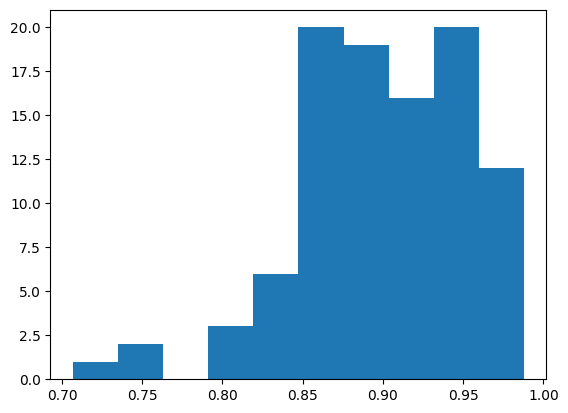

In [62]:
plt.hist(maxes)

In [59]:
ind = 4
ins = inpsall.iloc[ind]
hyps = ins['allhyps'][0]
scos = ins['allscos'][0]
print("INPUT: ", ins["input"])
print("OUTPUTS")
for a in list(zip(scos, hyps)):
    print(a)

INPUT:  Explain like I'm five years old What keeps bed bugs in check? Why haven't they taken over the world? Do they have any natural enemies? They seem pretty unstoppable - easy breeders, can live a long time without food, can survive harsh conditions, easy hitch hikers, and they feed on an endless supply of human blood.
OUTPUTS
(0.7549263239, "When bed bugs feed on humans, they produce chemicals that reduce the host's desire to feed. However, when humans live in close proximity, it can be hard for them to avoid waking up with them. Bed bugs may also become confused for other pests if they start to develop a strong odor. Because of these reasons, bed bugs have not taken over the world, but have spread to over 20 countries.")
(0.9180637002, "Fortunately for humans, bed bugs have a surprisingly modest population. The bugs can reproduce at an astounding rate of 300 to 400 per day, yet they're rarely able to take over a house, apartment or hotel room. In the United States and Canada, infe

In [ ]:
pflen = [.1, .2, .3]
rchoose = [2, 2, 2]
tsamps = [4, 4, 4]

#sampfrominp(3, 0, inpsall, pflen, rchoose, tsamps)
isall = inpsampall(inpsall.iloc[:20], pflen, rchoose, tsamps, 0, .7)

In [47]:
import matplotlib.pyplot as plt

(array([2., 0., 1., 1., 2., 6., 4., 2., 0., 2.]),
 array([-0.22032201, -0.18764285, -0.15496368, -0.12228452, -0.08960536,
        -0.05692619, -0.02424703,  0.00843214,  0.0411113 ,  0.07379047,
         0.10646963]),
 <BarContainer object of 10 artists>)

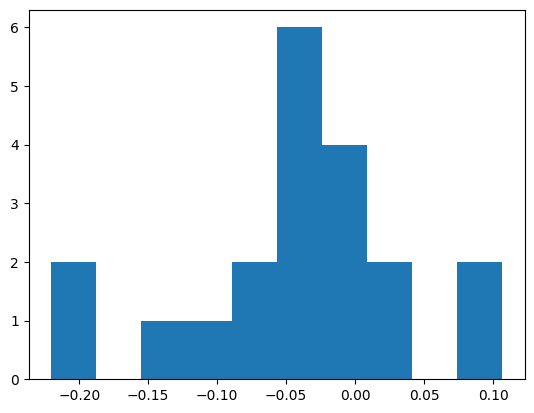

In [49]:
plt.hist(isall['newmax']-isall['oldmax'])

In [41]:
def sampfrominp(ind, row, inps, pflen, rchoose, tsamps, temp):
    prompt, orig_os, orig_scos, outs, scos = gen_rec_samp(elidf.iloc[ind], tokenizer, model, pflen, rchoose, tsamps, inps.iloc[ind], row, temp)
    nb = max(orig_scos[-1])
    ob = max(orig_scos[0])
    nav = mean(orig_scos[-1])
    oav = mean(orig_scos[0])
    oldscos = inps.iloc[ind]['allscos']
    obests = list([max(m) for m in oldscos])
    oavgs = list([sum(m)/len(m) for m in oldscos])
    
    print("newbest ", nb, "; oldbest ", ob)
    print("newavg ", nav, "; oldavg", oav)
    
    print("manybest ", mean(obests))
    print("manyavg", mean(oavgs))
    return prompt, orig_os, orig_scos, nav, oav, obests, oavgs, nb, ob

def inpsampall(inps, pflen, rchoose, tsamps, numind, temp):
    allvals = []
    for i in range(len(inps)):
        prompt, orig_os, orig_scos, nav, oav, obests, oavgs, nb, ob = sampfrominp(i, numind, inps, pflen, rchoose, tsamps, temp)
        allvals.append({
            'inp':prompt,
            'hyps':orig_os,
            'scos':orig_scos,
            'new_avg':nav,
            "old_avg":oav,
            "newmax":nb,
            "oldmax":ob,
            "obests":obests,
            "oavgs":oavgs
        })
        tmp = pd.DataFrame(allvals)
        tmp.to_json("prefpreds.jsonl", lines=True, orient="records")
    return tmp

def mean(l):
    return sum(l)/len(l)

In [25]:
def samprecind(ind, pflen, rchoose, tsamps, log=False):
    # algorithm 2
   
    prompt, orig_os, orig_scos, outs, scos = gen_rec_samp(elidf.iloc[ind], tokenizer, model, pflen, rchoose, tsamps)
    if log:
        print("Prefix len ", pflen, "; Chosen Top-N ", rchoose)
        printout(prompt, orig_os, orig_scos, outs, scos)
    return prompt, orig_os, orig_scos, outs, scos

def sampbase(ind, log=False):
    # algorithm 2
    pflen = [.1, .1, .1]
    rchoose = [2, 2, 2]
    tsamps = [4, 4,4]
    prompt, orig_os, orig_scos, outs, scos = gen_rec_samp(elidf.iloc[ind], tokenizer, model, pflen, rchoose, tsamps)
    if log:
        print("Prefix len ", pflen, "; Chosen Top-N ", rchoose)
        printout(prompt, orig_os, orig_scos, outs, scos)
    return prompt, orig_os, orig_scos, outs, scos

def gendirind(ind, log=False):
    pflen = .125
    startsamps = 8
    rchoose = 2
    tsamps = 2
    prompt, orig_os, orig_scos, outs, scos = gen_dir_beam(elidf.iloc[ind], tokenizer, model, pflen, rchoose, tsamps, startsamps)
    if log:
        print("Prefix len ", pflen, "; Chosen Top-N ", rchoose)
        printout(prompt, orig_os, orig_scos, outs, scos)
    return prompt, orig_os, orig_scos, outs, scos

def samprecall(start, end, pfls, rchs, tsmps):
    res = []
    for i in range(start, end):
        print(i)
        prompt, orig_os, orig_scos, outs, scos = samprecind(i, pfls, rchs, tsmps)
        # store all data
        res.append({
            'input':prompt,
            'allhyps':orig_os,
            'allscos':orig_scos
        })
    return pd.DataFrame(res)
    


In [ ]:
pflen = [0, 0, 0, 0, 0]
rchoose = [2, 2, 2, 2, 2]
tsamps = [4, 4, 4, 4, 4]
#samprecind(2, pflen, rchoose, tsamps)

df1 = samprecall(0,2, pflen, rchoose, tsamps)
df1.to_json("baselines1.jsonl", orient="records", lines=True)

In [75]:
df1['allscos'].iloc[1]

[[0.511057436466217,
  0.7633963227272034,
  0.8289591670036316,
  0.6666605472564697],
 [0.6761478185653687,
  0.7859654426574707,
  0.5408999919891357,
  0.5924620628356934],
 [0.6430632472038269,
  0.6309277415275574,
  0.6928672194480896,
  0.7909512519836426],
 [0.8620328307151794,
  0.8311976790428162,
  0.7524057030677795,
  0.7398936748504639],
 [0.6539881229400635,
  0.8679606914520264,
  0.7424838542938232,
  0.8543801307678223]]

In [11]:
model.man_pref = None

In [18]:
gen_row(elidf.iloc[8], tokenizer, model, "sample", 4)

monkeysamp


("Explain like I'm five years old: Why are we told to breathe in through our nose and out of our mouth while doing sports, meditation etc?",
 ['This breathing pattern is called a diaphragmatic breathing pattern, and is used for breathing out the stress of exercise, or in meditation.',
  'The nose is the main source of air flow and oxygen into the lungs. The mouth is the major source of carbon dioxide in the lungs. This makes it difficult for oxygen to get to the brain and other parts of the body, especially during a sports event.',
  'When we breathe through our nose, we take in oxygen and our body uses it to energize the muscles in our body. When we breathe through our mouth, we take out carbon dioxide and release it into the atmosphere, so that there is no carbon buildup inside of us.',
  'This technique is used to control your breathing and reduce panic attacks in athletes. The theory behind this method of breathing is that it causes you to calm down and allows you to focus on your 

In [ ]:
samprecind(1)

In [ ]:
sampport = samprecall(20)

In [ ]:
samplall = samprecall(100)

In [32]:
salldf = pd.DataFrame(samplall)

In [35]:
salldf.to_json("salldf.jsonl", orient="records",lines=True)

In [ ]:
# algorithm 1
ind = 7
pflen = 10
bsize = 4
rchoose = 2
prompt, orig_os, orig_scos, outs, scos = gen_dir_beam(elidf.iloc[ind], tokenizer, model, pflen, rchoose, bsize)
print("Prefix len ", pflen, "; Beam size ", bsize, "; Chosen Top-N ", rchoose)
printout(prompt, orig_os, orig_scos, outs, scos)

In [94]:
def getdatastats(allinps):
    ascos = []
    alens = []
    bscos = [[], [], []]
    for s in allinps:
        for scs in s['allscos']:

            ascos.extend(scs)
        for i in range(len(bscos)):
            bscos[i].append(max(s['allscos'][i]))
        for hy in s['allhyps']:
            alens.extend([len(h.split()) for h in hy])
    return ascos, alens, bscos

In [107]:
ascos, alens, bscos = getdatastats(sampport)

In [108]:
len(ascos)

560

In [88]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

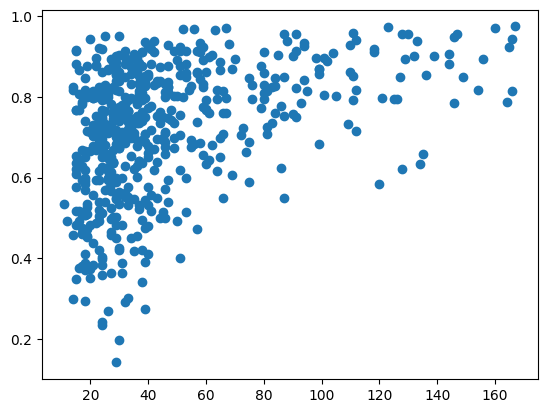

In [109]:
plt.scatter(alens, ascos)

In [110]:
list([sum(s)/len(s) for s in bscos])

[0.8846133410930633, 0.887361803650856, 0.8702863931655884]

In [111]:
pearsonr(alens, ascos)

PearsonRResult(statistic=0.40841173866952357, pvalue=6.346891566967767e-24)

In [ ]:
orig_scos

In [71]:
tokenizer.decode(model.config.decoder_start_token_id)

'<pad>'

In [30]:
# sanity check for data leakage 

In [37]:
def get_unhist_answers(orig):
    allas = []
    for h in orig['history'].unique():
        tmpans = []
        # get relevant stuff
        select = orig[orig['history']==h]
        tmpans.extend(list(select['human_ref_A']))
        tmpans.extend(list(select['human_ref_B']))
        allas.append({
            'inp':h,
            'answers':list(set(tmpans))
        })
    return allas
    

In [33]:
eliorig.loc[0]['history']

"Explain like I'm five years old: How does your body burn 2000 calories a day, but you have to run a mile to burn 100 extra? Basically the title. I saw this thing about how much you have to exercise to burn off certain foods and was wondering how your body burns so many calories by doing nothing."

In [38]:
allunans = get_unhist_answers(eliorig)

In [42]:
allunans[0]

{'inp': "Explain like I'm five years old: How does your body burn 2000 calories a day, but you have to run a mile to burn 100 extra? Basically the title. I saw this thing about how much you have to exercise to burn off certain foods and was wondering how your body burns so many calories by doing nothing.",
 'answers': ['A lot of you guys are missing the eli5.  2000 calories is your body doing all the "keeping you alive" and it never stops and this is over 24 hours.   100 calories is you making the body work really fast but over a short period... 10 minutes say. If you keep that effort up for 24 hours, you\'d be using err... 14,000 calories or so.  The difference you\'re missing is the time frame.',
  'Because generating body heat is much more intensive than moving around. Try to warm your hands by rubbing them against each other, it’s very difficult. Which is why trying to loose weight by physical exercise alone is going to be super difficult.  A lot of people are asking if being in th